# Trabalho NLP - Desafio 01

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import re
import numpy as np
from time import time
from pprint import pprint

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')


from nltk.stem import SnowballStemmer


from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mbjesus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mbjesus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Etapa 1 - Obter dados Rotulados

In [74]:
dataset = pd.read_csv("dataset/train.csv")

In [75]:
dataset

,title,category
0,Tampa Para Champanhe Cromado Ibili - 722500,ICE_BUCKETS
1,Copo Térmico Plástico Os Jetsons Família Espacial,THERMAL_CUPS_AND_TUMBLERS
2,Nobreak Sms Bivolt 600va Para Pc Ps4 Xbox,STABILIZERS_AND_UPS
3,Led De Balada Rgb Luz De Palco Dj Disco Strobo...,LED_STAGE_LIGHTS
4,Filtro De Lente Cpl 52mm Kenko Polarizador Par...,LENS_FILTERS
5,Hb20 Hb20s Hb20x Revisão Hyundai 1.6 50 Mil Km...,ENGINE_OIL_DIPSTICKS
6,Roller Row Semi-pro Cinza M Tam. 33 A 36 Patin...,ROLLER_SKATES
7,Kit Para Piscina De Vinil 1 Super Led Rgb + Ca...,POOL_LIGHTS
8,Nobreak Ups Server P/ Rack 19 3u 2200va 2x18a...,STABILIZERS_AND_UPS
9,Porta Chaves Gaveta Antiga.,KEY_RACKS


### 1.1 - Análise Descriva dos Dados

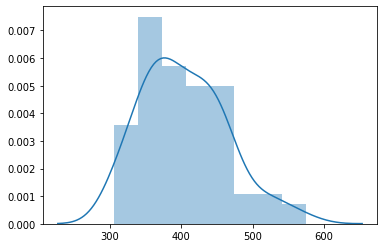

In [76]:
pd.value_counts(dataset["category"].values, sort=True)
sns.distplot(pd.value_counts(dataset["category"].values, sort=True))

Os dados estão desbalanceados na categoria.

## Etapa 2 - Pré-processamento 

### 2.1 - Converter para minúsculo

In [77]:
dataset["category"] = dataset["category"].str.lower()
dataset["title"] = dataset["title"].str.lower()

### 2.2 - Remover caractéres especiais

In [78]:
##FUNCAO QUE REMOVE CARACTERES ESPECIAIS
def remover_acentos(texto):
    ##REMOVER ACENTOS
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    
    ##REMOVER CARACTERES ESPECIAIS
    texto = re.sub(r'[?|$|&|*|%|@|(|)|~|,|\.|:|\-|\'|/|+]', r' ', texto)
    
    ##REMOVER MEDIDAS
    texto = re.sub('(va)|(mm)|(km)|(cm)', r' ', texto)
    
    ##REMOVER NUMEROS QUE APARECEM ISOLADOS
    texto = re.sub('[\s][0-9]{1,}', ' ', texto)
    
     ##REMOVER TEXTOS COM ATE DOIS CARACTERES
    texto = re.sub(r'\b\w{1,2}\b', ' ', texto)
    
    return texto



In [79]:
#aplica limpeza no texto
dataset["title_normalizado"] = dataset["title"].map(remover_acentos)
dataset

,title,category,title_normalizado
0,tampa para champanhe cromado ibili - 722500,ice_buckets,tampa para champanhe cromado ibili
1,copo térmico plástico os jetsons família espacial,thermal_cups_and_tumblers,copo termico plastico jetsons familia espacial
2,nobreak sms bivolt 600va para pc ps4 xbox,stabilizers_and_ups,nobreak sms bivolt para ps4 xbox
3,led de balada rgb luz de palco dj disco strobo...,led_stage_lights,led balada rgb luz palco disco strobo fe...
4,filtro de lente cpl 52mm kenko polarizador par...,lens_filters,filtro lente cpl kenko polarizador para ob...
5,hb20 hb20s hb20x revisão hyundai 1.6 50 mil km...,engine_oil_dipsticks,hb20 hb20s hb20x revisao hyundai mil orig...
6,roller row semi-pro cinza m tam. 33 a 36 patin...,roller_skates,roller row semi pro cinza tam patins mor
7,kit para piscina de vinil 1 super led rgb + ca...,pool_lights,kit para piscina vinil super led rgb casc...
8,nobreak ups server p/ rack 19 3u 2200va 2x18a...,stabilizers_and_ups,nobreak ups server rack x18ah bivolt ...
9,porta chaves gaveta antiga.,key_racks,porta chaves gaveta antiga


### 2.3 - Remover Stop-words

In [80]:
def remove_stopwords(texto):
    #REMOVER STOPWORDS
    ##baixar stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    
    #gera tokens
    tokens = word_tokenize(texto)
    
    #remove stopwords
    filtered_tokens = [token.lower() for token in tokens if token not in stopwords]
    
    #retorna texto sem as stop-words
    return ' '.join(filtered_tokens)

In [81]:
#aplica remocao de stop-words
dataset["title_normalizado_sem_sw"] = dataset["title_normalizado"].map(remove_stopwords)
dataset


,title,category,title_normalizado,title_normalizado_sem_sw
0,tampa para champanhe cromado ibili - 722500,ice_buckets,tampa para champanhe cromado ibili,tampa champanhe cromado ibili
1,copo térmico plástico os jetsons família espacial,thermal_cups_and_tumblers,copo termico plastico jetsons familia espacial,copo termico plastico jetsons familia espacial
2,nobreak sms bivolt 600va para pc ps4 xbox,stabilizers_and_ups,nobreak sms bivolt para ps4 xbox,nobreak sms bivolt ps4 xbox
3,led de balada rgb luz de palco dj disco strobo...,led_stage_lights,led balada rgb luz palco disco strobo fe...,led balada rgb luz palco disco strobo festa ba...
4,filtro de lente cpl 52mm kenko polarizador par...,lens_filters,filtro lente cpl kenko polarizador para ob...,filtro lente cpl kenko polarizador objeti
5,hb20 hb20s hb20x revisão hyundai 1.6 50 mil km...,engine_oil_dipsticks,hb20 hb20s hb20x revisao hyundai mil orig...,hb20 hb20s hb20x revisao hyundai mil original
6,roller row semi-pro cinza m tam. 33 a 36 patin...,roller_skates,roller row semi pro cinza tam patins mor,roller row semi pro cinza tam patins mor
7,kit para piscina de vinil 1 super led rgb + ca...,pool_lights,kit para piscina vinil super led rgb casc...,kit piscina vinil super led rgb cascata led
8,nobreak ups server p/ rack 19 3u 2200va 2x18a...,stabilizers_and_ups,nobreak ups server rack x18ah bivolt ...,nobreak ups server rack x18ah bivolt bivol
9,porta chaves gaveta antiga.,key_racks,porta chaves gaveta antiga,porta chaves gaveta antiga


### 2.4 - Transformar para Radical

In [82]:
def stemmer_sentenca(texto):
    
    #baixa dados
    pt_stemmer = SnowballStemmer('portuguese')
    
    #divide em tokens
    tokens = word_tokenize(texto)
    
    #aplica stemmer
    lista_stem = [pt_stemmer.stem(token) for token in tokens ]
    
    #retorna texto 
    return ' '.join(lista_stem)

In [83]:
#aplica limpeza stemmer
dataset["title_normalizado_sem_sw_stemmer"] = dataset["title_normalizado_sem_sw"].map(stemmer_sentenca)
dataset


,title,category,title_normalizado,title_normalizado_sem_sw,title_normalizado_sem_sw_stemmer
0,tampa para champanhe cromado ibili - 722500,ice_buckets,tampa para champanhe cromado ibili,tampa champanhe cromado ibili,tamp champanh crom ibil
1,copo térmico plástico os jetsons família espacial,thermal_cups_and_tumblers,copo termico plastico jetsons familia espacial,copo termico plastico jetsons familia espacial,cop termic plastic jetsons famil espacial
2,nobreak sms bivolt 600va para pc ps4 xbox,stabilizers_and_ups,nobreak sms bivolt para ps4 xbox,nobreak sms bivolt ps4 xbox,nobreak sms bivolt ps4 xbox
3,led de balada rgb luz de palco dj disco strobo...,led_stage_lights,led balada rgb luz palco disco strobo fe...,led balada rgb luz palco disco strobo festa ba...,led bal rgb luz palc disc strob fest bal
4,filtro de lente cpl 52mm kenko polarizador par...,lens_filters,filtro lente cpl kenko polarizador para ob...,filtro lente cpl kenko polarizador objeti,filtr lent cpl kenk polariz objet
5,hb20 hb20s hb20x revisão hyundai 1.6 50 mil km...,engine_oil_dipsticks,hb20 hb20s hb20x revisao hyundai mil orig...,hb20 hb20s hb20x revisao hyundai mil original,hb20 hb20s hb20x revisa hyunda mil original
6,roller row semi-pro cinza m tam. 33 a 36 patin...,roller_skates,roller row semi pro cinza tam patins mor,roller row semi pro cinza tam patins mor,roll row sem pro cinz tam patins mor
7,kit para piscina de vinil 1 super led rgb + ca...,pool_lights,kit para piscina vinil super led rgb casc...,kit piscina vinil super led rgb cascata led,kit piscin vinil sup led rgb cascat led
8,nobreak ups server p/ rack 19 3u 2200va 2x18a...,stabilizers_and_ups,nobreak ups server rack x18ah bivolt ...,nobreak ups server rack x18ah bivolt bivol,nobreak ups serv rack x18ah bivolt bivol
9,porta chaves gaveta antiga.,key_racks,porta chaves gaveta antiga,porta chaves gaveta antiga,port chav gavet antig


### 2.5 - Balancear Dados com Uper-Undersampling

In [84]:
def balencearMesmaClasse(df_desbalanceado,tamanho):
        
    lista_categorias = df_desbalanceado.category.unique()
        
    df_sampled = pd.DataFrame()

    for categoria in lista_categorias:

        df_tmp = df_desbalanceado[df_desbalanceado.category == categoria]

        if(len(df_tmp)) > tamanho:
            ##como a classe tem mais registros que o tamanho, fazer SEM repeticao
            df_tmp = resample(df_tmp, 
                             replace=False,    
                             n_samples=(tamanho),    
                             random_state=123) 
        else:
            ##como a classe tem mais registros que o tamanho, fazer COM repeticao
            df_tmp = resample(df_tmp, 
                             replace=True,    
                             n_samples=(tamanho),    
                             random_state=123)

        df_sampled = pd.concat([df_sampled, df_tmp])

    return df_sampled

In [85]:
dataset_balanceado = balencearMesmaClasse(dataset,370)


/Users/mbjesus/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mbjesus/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


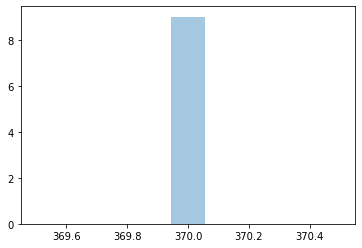

In [86]:
pd.value_counts(dataset_balanceado["category"].values, sort=True)
sns.distplot(pd.value_counts(dataset_balanceado["category"].values, sort=True))


In [87]:
dataset_balanceado.shape

(30710, 5)

In [88]:
dataset.shape

(33500, 5)

### 2.6 - Avaliar Pesos dos tokens

In [89]:
def ponderarPalavras(X_train):
    """ CONSTRUIR MATRIZ ESPARSA """ 
    count_vect = CountVectorizer()

    """ "fazer fit_transoform (vetor de palavras) para os dados de treino """
    X_train_counts = count_vect.fit_transform(X_train)

    """ ponderar palavras mais frequentes  """
    tf_transformer = TfidfTransformer()
    X_train_tf = tf_transformer.fit_transform(X_train_counts)

    palavras = np.asarray(count_vect.get_feature_names())
    pesos = np.asarray(X_train_tf.sum(axis=0))

    it_palavras = np.nditer(palavras, flags=['f_index'])
    it_pesos = np.nditer(pesos, flags=['f_index'])

    lista_palavras_peso = []

    while not it_palavras.finished:
        lista_palavras_peso.append((it_palavras[0], it_pesos[0]))
        it_palavras.iternext()
        it_pesos.iternext()

    labels = ["palavra","peso"]
    dataset = pd.DataFrame.from_records(lista_palavras_peso,columns=labels)
    dataset = dataset.sort_values(by=['peso'], ascending=False)
    print(dataset[:80])

In [90]:
ponderarPalavras(dataset_balanceado["title_normalizado_sem_sw_stemmer"])

           palavra                peso
7903           kit   659.8462959704308
9341         motor  408.84713092528466
10151     original   376.8377490584982
11093         pret  270.99120487630023
10964         port  255.81825672892577
1975         branc  253.69857940341132
8705      mangueir  246.00803646963362
2324          caix  220.91581913274183
5557         filtr  215.71925909912474
4960          esco  214.67311417784168
3129           com   213.3679650689816
8497          lvul  210.69530387196616
1477           bat  208.23232027540286
2522        carreg  208.11009362516467
2360           cam  202.32295184485633
11924          rod    202.076125205493
11204     protetor  197.28556193663968
4053      dianteir  186.96054161391143
2255           cab  186.52433447123738
2810          chav  182.44274417103045
13975      traseir   181.1565068572957
8159           led  180.37432941709747
4077       digital  174.47928991578218
4782       embreag  169.78289985176258
7287          inox  163.7

## Etapa 3 - Aplicar aprendizado de máquina 

### Configurações do Grid

<br>Usaremos uma combinação de Pipeline e Grid Search para configurar as etapas de (1) Criação da Matriz Esparsa, (2) Aplicar TF-IDF e (3) executar o modelo de machine learning, utilizando cross validation.

<br>

Para cada etapa do Grid serão testados diferentes configurações de hiperparâmetros. No final, a melhor configuração de parâmetros será exibida para cada modelo.

<br>

In [91]:
##Configurando variáveis do Grid

cv_G =5 #Numero de Folds do cross-validation
n_jobs_G =-1
verbose_G =1

#CRIAR LISTA PARA ARMAZENAR GRIDS QUE SERAO EXECUTADOS
lista_grids = []

### SGDClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [92]:
#Definindo o Pipeline 
pipeline_SGDClassifier = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(tol=1e-3)),
])

#Configurando parametros do grid
parameters_SGDClassifier = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df':(1,3,5),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)), 
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': ( 50, 80, 100),
}

In [93]:
#Configurando Grid Search
grid_search_SGDClassifier = GridSearchCV(pipeline_SGDClassifier, 
                                         parameters_SGDClassifier, 
                                         cv=cv_G,
                                         n_jobs=n_jobs_G, 
                                         verbose=verbose_G)


In [94]:
#Adiciona grid na lista
lista_grids.append((grid_search_SGDClassifier,pipeline_SGDClassifier,parameters_SGDClassifier,"SGDClassifier"))

### RandomForestClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)


In [95]:
#Definindo o Pipeline 
pipeline_RandomForestClassifier = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])

#Configurando parametros do grid
parameters_RandomForestClassifier = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df':(1,3,5),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)), 
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__n_estimators': (200,400),
    'clf__max_depth': (3, 6, 10),
    'clf__random_state': (0,),
}

In [96]:
#Configurando Grid Search
grid_search_RandomForestClassifier = GridSearchCV(pipeline_RandomForestClassifier, 
                                                     parameters_RandomForestClassifier, 
                                                     cv=cv_G,
                                                     n_jobs=n_jobs_G, 
                                                     verbose=verbose_G)


In [97]:
#Adiciona grid na lista
lista_grids.append((grid_search_RandomForestClassifier,pipeline_RandomForestClassifier,parameters_RandomForestClassifier,"RandomForestClassifier"))


### LinearSVC (https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [98]:
#Definindo o Pipeline 
pipeline_LinearSVC = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),
])

#Configurando parametros do grid
parameters_LinearSVC = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df':(1,3,5),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)), 
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__penalty': ('l2',),
    'clf__max_iter': (500,1000,1500),
}


In [99]:
#Configurando Grid Search
grid_search_LinearSVC = GridSearchCV(pipeline_LinearSVC, 
                                     parameters_LinearSVC, 
                                     cv=cv_G,
                                     n_jobs=n_jobs_G, 
                                     verbose=verbose_G)


In [100]:
#Adiciona grid na lista
lista_grids.append((grid_search_LinearSVC,pipeline_LinearSVC,parameters_LinearSVC,"LinearSVC"))


### MultinomialNB (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [101]:
#Definindo o Pipeline 
pipeline_MultinomialNB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

#Configurando parametros do grid
parameters_MultinomialNB = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df':(1,3,5),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)), 
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
}


In [102]:
#Configurando Grid Search
grid_search_MultinomialNB = GridSearchCV(pipeline_MultinomialNB, 
                                     parameters_MultinomialNB, 
                                     cv=cv_G,
                                     n_jobs=n_jobs_G, 
                                     verbose=verbose_G)


In [103]:
#Adiciona grid na lista
lista_grids.append((grid_search_MultinomialNB,pipeline_MultinomialNB,parameters_MultinomialNB,"MultinomialNB"))

<br>

### LogisticRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

<br>

In [104]:
#Definindo o Pipeline 
pipeline_LogisticRegression = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

#Configurando parametros do grid
parameters_LogisticRegression = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df':(1,3,5),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)), 
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__solver': ('lbfgs','saga'),
    'clf__penalty': ('l2',),
    'clf__max_iter': (10, 50, 80,100),
}

In [105]:
#Configurando Grid Search
grid_search_LogisticRegression = GridSearchCV(pipeline_LogisticRegression, 
                                     parameters_LogisticRegression, 
                                     cv=cv_G,
                                     n_jobs=n_jobs_G, 
                                     verbose=verbose_G)

In [106]:
#Adiciona grid na lista
lista_grids.append((grid_search_LogisticRegression,pipeline_LogisticRegression,parameters_LogisticRegression,"LogisticRegression"))

<br>

### Executar Grids

<br>


In [107]:
#TRANSFORMAR EM UM DATAFRAME
labels = ["grid","pipeline","parametros","modelo"]
df_grids = pd.DataFrame.from_records(lista_grids,columns=labels)

#Exibir Grids
df_grids


,grid,pipeline,parametros,modelo
0,"GridSearchCV(cv=5, error_score='raise-deprecat...","(CountVectorizer(analyzer='word', binary=False...","{'vect__max_df': (0.5, 0.75, 1.0), 'vect__min_...",SGDClassifier
1,"GridSearchCV(cv=5, error_score='raise-deprecat...","(CountVectorizer(analyzer='word', binary=False...","{'vect__max_df': (0.5, 0.75, 1.0), 'vect__min_...",RandomForestClassifier
2,"GridSearchCV(cv=5, error_score='raise-deprecat...","(CountVectorizer(analyzer='word', binary=False...","{'vect__max_df': (0.5, 0.75, 1.0), 'vect__min_...",LinearSVC
3,"GridSearchCV(cv=5, error_score='raise-deprecat...","(CountVectorizer(analyzer='word', binary=False...","{'vect__max_df': (0.5, 0.75, 1.0), 'vect__min_...",MultinomialNB
4,"GridSearchCV(cv=5, error_score='raise-deprecat...","(CountVectorizer(analyzer='word', binary=False...","{'vect__max_df': (0.5, 0.75, 1.0), 'vect__min_...",LogisticRegression


In [108]:
## Funcao que executa os grids
def executarGrids(grid_search,pipeline,parameters,modelo,dataset_textos,dataset_categoria):

    #Executando e mostrando resultados
    print("#################  INICIO   ########################")
    print("Executando Grid Search Para ",(modelo))
    print("Configuração do Pipeline:", [name for name, _ in pipeline.steps])
    print("Parametros:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(dataset_textos, dataset_categoria)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Melhor score: %0.3f" % grid_search.best_score_)
    print("Melhores Parametros:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
    print(" ___________________ FIM ____________________  ")
    

In [109]:
#Usar apenas 1000 registros para testar o grid
datasettestes = dataset_balanceado

#Executar Grids
for index, row in df_grids.iterrows():
    executarGrids(row["grid"],
                  row["pipeline"],
                  row["parametros"],
                  row["modelo"],
                  datasettestes["title_normalizado_sem_sw_stemmer"], 
                  datasettestes["category"])


#################  INICIO   ########################
Executando Grid Search Para  SGDClassifier
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (50, 80, 100),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 72.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 83.8min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 99.5min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 113.4min
[Parallel(n_jobs=-1)]: Done 11234 tasks      

done in 12131.907s

Melhor score: 0.956
Melhores Parametros:
	clf__alpha: 1e-05
	clf__max_iter: 80
	clf__penalty: 'l2'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  RandomForestClassifier
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__max_depth': (3, 6, 10),
 'clf__n_estimators': (200, 400),
 'clf__random_state': (0,),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 60.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 76.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 89.1min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 114.1min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 118.0min finished


done in 7082.902s

Melhor score: 0.865
Melhores Parametros:
	clf__max_depth: 10
	clf__n_estimators: 400
	clf__random_state: 0
	tfidf__norm: 'l1'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  LinearSVC
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__max_iter': (500, 1000, 1500),
 'clf__penalty': ('l2',),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 49.9min finished


done in 2999.825s

Melhor score: 0.955
Melhores Parametros:
	clf__max_iter: 500
	clf__penalty: 'l2'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: 50000
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  MultinomialNB
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mbjesus/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.0min finished


done in 301.355s

Melhor score: 0.941
Melhores Parametros:
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  LogisticRegression
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__max_iter': (10, 50, 80, 100),
 'clf__penalty': ('l2',),
 'clf__solver': ('lbfgs', 'saga'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 87.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 127.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 190.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 245.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 356.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 446.1min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 558.4min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 682.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks

done in 52115.252s

Melhor score: 0.938
Melhores Parametros:
	clf__max_iter: 80
	clf__penalty: 'l2'
	clf__solver: 'saga'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 1.0
	vect__max_features: 50000
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  


### Obter resultados com textos sem Stemming

In [110]:
#Executar Grids
for index, row in df_grids.iterrows():
    executarGrids(row["grid"],
                  row["pipeline"],
                  row["parametros"],
                  row["modelo"],
                  datasettestes["title_normalizado_sem_sw"], 
                  datasettestes["category"])

#################  INICIO   ########################
Executando Grid Search Para  SGDClassifier
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (50, 80, 100),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 53.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 64.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 75.2min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 89.7min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 103.1min
[Parallel(n_jobs=-1)]: Done 11234 tasks      

done in 11238.869s

Melhor score: 0.956
Melhores Parametros:
	clf__alpha: 1e-05
	clf__max_iter: 50
	clf__penalty: 'l2'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.75
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  RandomForestClassifier
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__max_depth': (3, 6, 10),
 'clf__n_estimators': (200, 400),
 'clf__random_state': (0,),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 82.0min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 104.3min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 107.8min finished


done in 6470.101s

Melhor score: 0.858
Melhores Parametros:
	clf__max_depth: 10
	clf__n_estimators: 400
	clf__random_state: 0
	tfidf__norm: 'l2'
	tfidf__use_idf: False
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 1)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  LinearSVC
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__max_iter': (500, 1000, 1500),
 'clf__penalty': ('l2',),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
/Users/mbjesus/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 48.9min finishe

done in 2939.366s

Melhor score: 0.954
Melhores Parametros:
	clf__max_iter: 500
	clf__penalty: 'l2'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  MultinomialNB
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mbjesus/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.6min finished


done in 278.779s

Melhor score: 0.941
Melhores Parametros:
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 0.5
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  
#################  INICIO   ########################
Executando Grid Search Para  LogisticRegression
Configuração do Pipeline: ['vect', 'tfidf', 'clf']
Parametros:
{'clf__max_iter': (10, 50, 80, 100),
 'clf__penalty': ('l2',),
 'clf__solver': ('lbfgs', 'saga'),
 'tfidf__norm': ('l1', 'l2'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__min_df': (1, 3, 5),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 48.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 69.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 100.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 156.0min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 203.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 291.7min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 365.1min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 456.4min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 561.5min
[Parallel(n_jobs=-1)]: Done 11234 tasks

done in 42634.058s

Melhor score: 0.937
Melhores Parametros:
	clf__max_iter: 10
	clf__penalty: 'l2'
	clf__solver: 'saga'
	tfidf__norm: 'l2'
	tfidf__use_idf: True
	vect__max_df: 1.0
	vect__max_features: None
	vect__min_df: 1
	vect__ngram_range: (1, 2)
 ___________________ FIM ____________________  


### 3.3 - Comparar o resultado dos modelos e selecionar o melhor

## Etapa 4 - Avaliação

FIM! =D